### Algorithm for Graph Coloring

In [1]:
import numpy as np
import pandas as pd
import time 
import networkx as nx
import matplotlib.pyplot as plt
import gcol

In [2]:
graphs = [i for i in range(10, 100, 10)] + [i for i in range(100, 250, 25)] + [i for i in range(250, 1001, 50)]

In [3]:
def read_data_edge_list(filename): 
    ''' 
    reads data from edge list input file and returns nx.Graph object 
    '''

    file = open(filename, 'r')
    content = file.readlines()

    n = int(content[0]) # number of vertices 
    m = int(content[1]) # number of edges 

    G = nx.Graph()

    # range(2, 2*m+2) for .pg files 
    # range(2, m+2) for .txt files
    for l in range(2, m+2): 
        line = content[l]
        line_split = line.split(' ')
        u = int(line_split[0])
        v = int(line_split[1])
        G.add_node(u)
        G.add_node(v)
        G.add_edge(u, v)
    return G

In [4]:
def algorithm(G: nx.graph, n: int): 
    c = gcol.node_k_coloring(G, 4, opt_alg=1)
    c_num = max(c.values()) + 1
    return c_num

In [5]:
def write_to_csv(filename: str, data: float, n: int): 
    ''' 
    writes the results to a csv file 
    '''

    df = pd.read_csv(filename)
    df.set_index('Graph', inplace=True)
    index = 'graph_'+str(n)
    df.loc[index, 'Algorithm'] = np.round(data, 5)
    df.to_csv(filename, index=True)

    return 

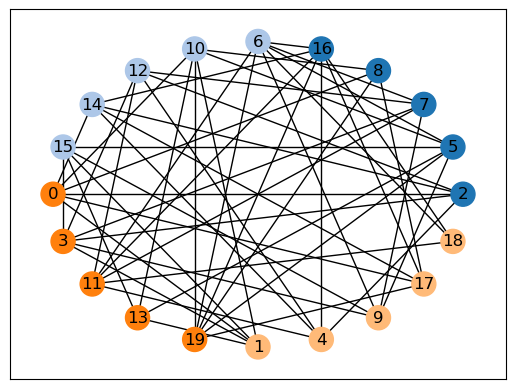

In [6]:
# visualization of first graph 
G = read_data_edge_list('./generated/graph_20.txt')

c = gcol.node_k_coloring(G, 4, opt_alg=1)
nx.draw_networkx(G,
                 pos=gcol.coloring_layout(G, c),
                 node_color=gcol.get_node_colors(G, c))
plt.show()

In [7]:
for n in graphs: 

    G = read_data_edge_list('./generated/graph_'+str(n)+'.txt')

    start = time.time()

    for i in range(10): 
        c_num = algorithm(G, n)

    end = time.time()

    print("Colors for graph_"+str(n)+" =", c_num)

    # determine runtime 
    runtime = (end-start)/10

    write_to_csv('./results/results_runtime.csv', runtime, n)

Colors for graph_10 = 4
Colors for graph_20 = 4
Colors for graph_30 = 4
Colors for graph_40 = 4
Colors for graph_50 = 4
Colors for graph_60 = 4
Colors for graph_70 = 4
Colors for graph_80 = 4
Colors for graph_90 = 4
Colors for graph_100 = 4
Colors for graph_125 = 4
Colors for graph_150 = 4
Colors for graph_175 = 4
Colors for graph_200 = 4


KeyboardInterrupt: 